# Case Study - Wine Quality Prediction

# Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are 
much more normal wines than excellent or poor ones).


Article: A methematical theory of communication
http://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf

Article: Why should I trust you?

https://arxiv.org/pdf/1602.04938.pdf

Article: 
https://gdcoder.com/decision-tree-regressor-explained-in-depth/#:~:text=Decision%20trees%20regression%20normally%20use,the%20data%20into%20two%20subset.&text=The%20tree%20chooses%20the%20value%20with%20results%20in%20smallest%20MSE%20value.

# Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

# Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

## Number of Instances: red wine - 1599; white wine - 4898. 

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None

### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


# Import all necessary modules and load the data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
wine_df = pd.read_csv('winequality-red.csv',sep=',')

# Print 10 samples from the dataset

In [3]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Print the datatypes of each column and the shape of the dataset

In [5]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine_df.shape

(1599, 12)

# Print the descriptive statistics of each & every column using describe() function

In [7]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.
What are your observations (any two attributes).

In [8]:
#plot the graphs of different variable to see the distributions.

import matplotlib.pyplot as plt
import seaborn as sns

/Users/vsananda/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

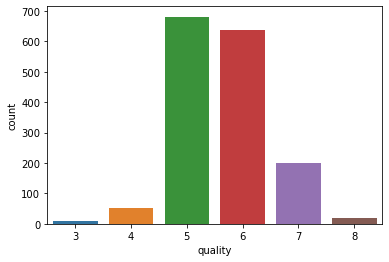

In [9]:
sns.countplot(wine_df['quality'])

/Users/vsananda/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

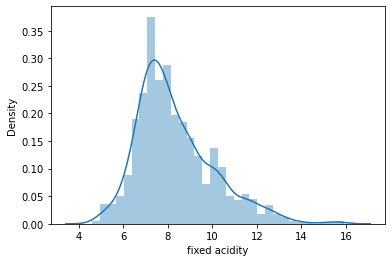

In [10]:
sns.distplot(wine_df['fixed acidity'])

/Users/vsananda/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

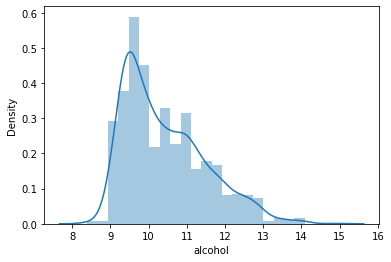

In [11]:
sns.distplot(wine_df['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

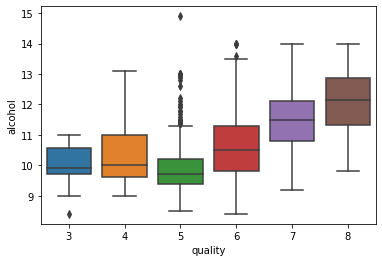

In [12]:
sns.boxplot(x='quality', y = 'alcohol', data = wine_df)

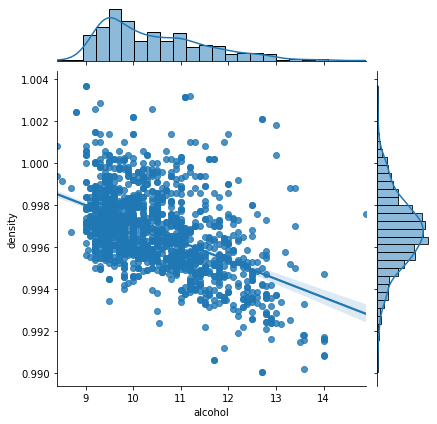

In [13]:
sns.jointplot(x = 'alcohol', y = 'density', data = wine_df, kind = 'reg')

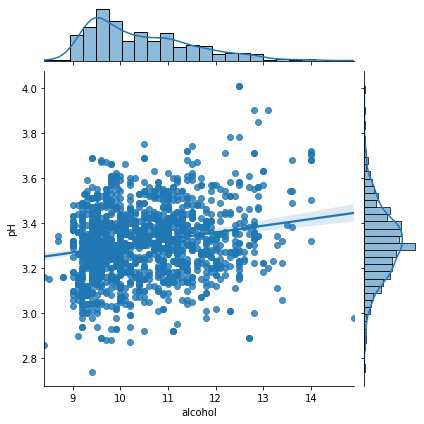

In [14]:
sns.jointplot(x = 'alcohol', y = 'pH', data = wine_df, kind = 'reg')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

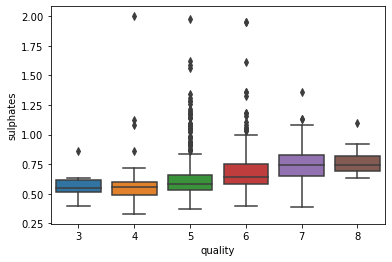

In [15]:
sns.boxplot(x='quality', y = 'sulphates', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

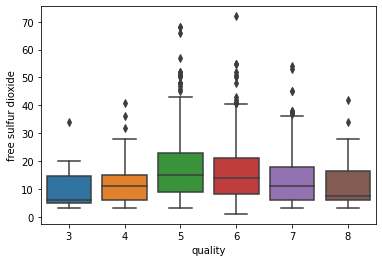

In [16]:
sns.boxplot(x='quality', y = 'free sulfur dioxide', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

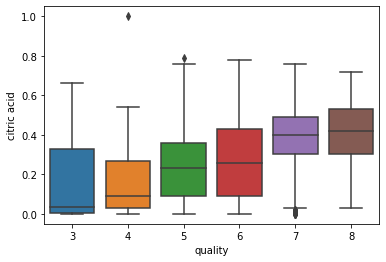

In [17]:
sns.boxplot(x='quality', y = 'citric acid', data = wine_df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

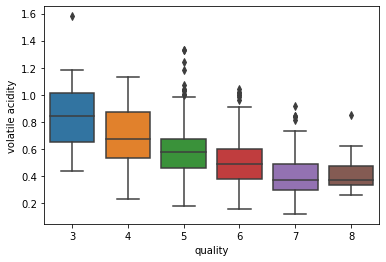

In [18]:
sns.boxplot(x='quality', y = 'volatile acidity', data = wine_df)

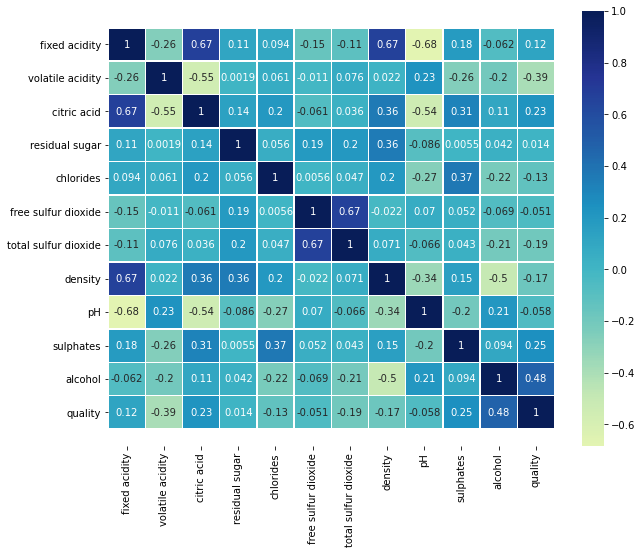

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(wine_df.corr(),
           annot = True,
           linewidths = 0.5,
           center = 0,
           cmap = "YlGnBu")
b, t = plt.ylim()
b +=0.5
t -= 0.5
plt.ylim (b,t)
plt.show()

## 

# Use correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

plt.figure(figsize=(10,8))
sns.heatmap(wine_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [20]:
#levels of Y variable
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
wine_df['quality'] = wine_df['quality'].replace(8,7)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

#### Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [22]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25,
                                                   random_state=22)
X_train.shape,X_test.shape

((1199, 11), (400, 11))

## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [23]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [24]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Print the accuracy of the model & print the confusion matrix

In [25]:
model_entropy.score(X_train, y_train)  # performance on train data

1.0

In [26]:
model_entropy.score(X_test, y_test)  # performance on test data

0.6225

#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [27]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [29]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [30]:
print(accuracy_score(y_train, preds_pruned_train))
print(accuracy_score(y_test, preds_pruned))

0.6071726438698916
0.5975


#### When the tree is regularized, overfitting is reduced, but there is no increase in accuracy

## Visualizing the tree

In [31]:
!pip install pydotplus

In [32]:
!pip install graphviz

### You might need to install pydotplus and graphviz packages for visualising the tree. 

In [34]:

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\TASLEEMAHMAD\\anaconda32\\Library\\bin\\graphviz'

xvar = wine_df.drop('quality', axis=1)
feature_cols = xvar.columns

ModuleNotFoundError: No module named 'pydotplus'

In [35]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

NameError: name 'feature_cols' is not defined

In [36]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [37]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.5975
0.6071726438698916


In [38]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [39]:
# Confusion matrix
pd.crosstab(y_test, preds_pruned, rownames=['Actual'], colnames=['Predicted'])

Predicted,5,6,7
Actual,,,
5,139,50,1
6,69,83,9
7,5,27,17


In [40]:
# Visualize model performance with yellowbrick library
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

ModuleNotFoundError: No module named 'yellowbrick'

#### Performance metrics

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [41]:
## Calculating feature importance
feature_cols = [col for col in wine_df.columns if col != 'quality']

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
alcohol,0.629149
sulphates,0.192173
volatile acidity,0.095558
total sulfur dioxide,0.083121
fixed acidity,0.000000
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
density,0.000000


#### From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [42]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975


### We have seen decision tree in action in this session, we will explore techniques that can help us improve this model in the next sessions.

### Apply the Random forest model and print the accuracy of Random forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [44]:
??RandomForestClassifier
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [45]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [46]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975
0,Random Forest,0.7075


In [47]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

NameError: name 'ClassificationReport' is not defined

#### Compared to the decision tree, we can see that the accuracy has significantly improved for the Random forest model

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [49]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [50]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975
0,Random Forest,0.7075
0,Adaboost,0.6350


In [51]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

NameError: name 'ClassificationReport' is not defined

### Apply Bagging Classifier Algorithm and print the accuracy.

In [52]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [53]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [54]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975
0,Random Forest,0.7075
0,Adaboost,0.6350
0,Bagging,0.6900


In [55]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

NameError: name 'ClassificationReport' is not defined

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [57]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [58]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975
0,Random Forest,0.7075
0,Adaboost,0.6350
0,Bagging,0.6900
0,Gradient Boost,0.6425


In [59]:
??GradientBoostingClassifier

### GridSearchCV optimize hyper parameters


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




In [91]:
params_dict = {'n_estimators':[90,100,110,120,130,140], 'max_features':['auto', 'sqrt', 'log2']}
clf_rf = RandomizedSearchCV(estimator = RandomForestClassifier(n_jobs = -1), n_jobs=-1,
                      param_distributions = params_dict, scoring = 'accuracy', cv = 10,verbose=True)
clf_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.8s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [90, 100, 110, 120, 130,
                                                         140]},
                   scoring='accuracy', verbose=True)

In [92]:
clf_rf.best_score_

0.7280882352941176

In [93]:
clf_rf.best_params_

{'n_estimators': 100, 'max_features': 'log2'}

In [95]:
pred = clf_rf.predict(X_test)
accuracy_score(pred, y_test)

0.7

In [96]:
params_dict = {'n_estimators':[90,100,110,120,130,140], 'max_features':['auto', 'sqrt', 'log2']}
clf_rf = GridSearchCV(estimator = RandomForestClassifier(n_jobs = -1), n_jobs=-1,
                      param_grid = params_dict, scoring = 'accuracy', cv = 10,verbose=True)
clf_rf.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   17.5s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [90, 100, 110, 120, 130, 140]},
             scoring='accuracy', verbose=True)

In [97]:
clf_rf.best_score_

0.7263935574229692

In [98]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 110}

In [99]:
pred = clf_rf.predict(X_test)
acc_GS = accuracy_score(pred, y_test)

tempResultsDf = pd.DataFrame({'Method':['Grid Search Random Forest'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975
0,Random Forest,0.7075
0,Adaboost,0.6350
0,Bagging,0.6900
0,Gradient Boost,0.6425
0,Grid Search Random Forest,0.6425
0,Random Forest PCA,0.6750
0,Grid Search Random Forest,0.6425
0,Grid Search Random Forest,0.6425


In [64]:
x = wine_df.drop('quality', axis = 1)

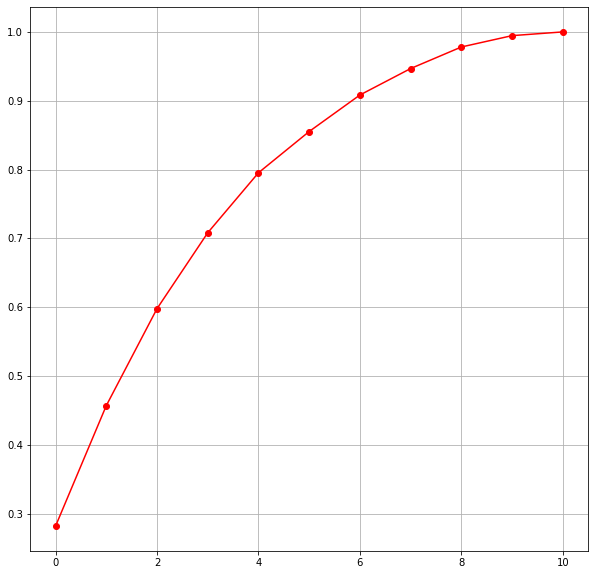

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [66]:
pca_new= PCA(n_components = 11)
x_new = pca_new.fit_transform(x)

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_new, wine_df['quality'], test_size=.25, random_state=22)

In [68]:
rfcl2 = RandomForestClassifier(n_estimators = 200)
rfcl2 = rfcl2.fit(X_train2, y_train2)
pred_RF = rfcl2.predict(X_test2)
acc_RF = accuracy_score(y_test2, pred_RF)

tempResultsDf = pd.DataFrame({'Method':['Random Forest PCA'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.5975
0,Random Forest,0.7075
0,Adaboost,0.6350
0,Bagging,0.6900
0,Gradient Boost,0.6425
0,Grid Search Random Forest,0.6425
0,Random Forest PCA,0.6750


In [69]:
import lime
import lime.lime_tabular

ModuleNotFoundError: No module named 'lime'

In [70]:
predict_fn_rf = lambda x: rfcl2.predict_proba(x).astype(float)
X=X_train2
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names = wine_df.drop('quality', axis = 1).columns, class_names = ['Low', 'Medium', 'High'], kernel_width = 5)


NameError: name 'lime' is not defined

In [71]:
y_test.values[105]

5

In [72]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
959,8.0,0.59,0.05,2.0,0.089,12.0,32.0,0.99735,3.36,0.61,10.0
1447,6.8,0.67,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7
1481,8.2,0.28,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3
924,8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
...,...,...,...,...,...,...,...,...,...,...,...
180,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
475,9.6,0.68,0.24,2.2,0.087,5.0,28.0,0.99880,3.14,0.60,10.2
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9
1267,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4


In [73]:
choosen_instance = X_test.values[105]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf, num_features = 10, labels=[0])
exp.show_in_notebook(show_all = True)

NameError: name 'explainer' is not defined

In [74]:
y_test.values[110]

6

In [75]:
choosen_instance = X_test.values[110]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf, num_features = 10, labels=[1])
exp.show_in_notebook(show_all = True)

NameError: name 'explainer' is not defined

In [76]:
y_test.values[-9]

7

In [77]:
choosen_instance = X_test.values[-9]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf, num_features = 10, labels=[2])
exp.show_in_notebook(show_all = True)

NameError: name 'explainer' is not defined